In [2]:
from ultralytics import YOLO

from IPython.display import display, Image


In [16]:
from roboflow import Roboflow
rf = Roboflow(api_key="bnztG7tp39W6cj0gLluk")
project = rf.workspace("sfu-9xefs").project("coronarography")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.207, to fix: `pip install ultralytics==8.0.196`


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\yormu\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\yormu\AppData\Local\Temp\ipykernel_27808\192894714.py", line 4, in <module>
    dataset = project.version(1).download("yolov8")
  File "C:\Projects\SFU\Coronarography\venv\lib\site-packages\roboflow\core\version.py", line 231, in download
    self.__download_zip(link, location, model_format)
  File "C:\Projects\SFU\Coronarography\venv\lib\site-packages\roboflow\core\version.py", line 659, in __download_zip
    for chunk in tqdm(
  File "C:\Projects\SFU\Coronarography\venv\lib\site-packages\tqdm\std.py", line 1182, in __iter__
    for obj in iterable:
  File "C:\Projects\SFU\Coronarography\venv\lib\site-packages\requests\models.py", line 816, in generate
    yield from self.raw.stream(chunk_size, decode_content=True)
  File "C:\Projects\SFU\Corona

TypeError: object of type 'NoneType' has no len()

In [3]:
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

model.train(data="Coronarography-1\data.yaml", epochs=10)
metrics = model.val()
#path = model.export(format="onnx")  # export the model to ONNX format

Ultralytics YOLOv8.0.207  Python-3.9.3 torch-2.1.0+cpu CPU (AMD Ryzen 7 4700U with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=Coronarography-1\data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ker

ModuleNotFoundError: No module named 'onnx'

In [2]:
from ultralytics import YOLO
from PIL import Image
import cv2

model = YOLO("runs/detect/train11/weights/best.pt")

im1 = Image.open("Coronarography-1/test/images/14_002_5_0020_bmp.rf.7f1470500a6d804a67a296e92541b48a.jpg")
results = model.predict(source=im1)  # save plotted images


0: 640x640 1 Stenosis, 98.1ms
Speed: 4.0ms preprocess, 98.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


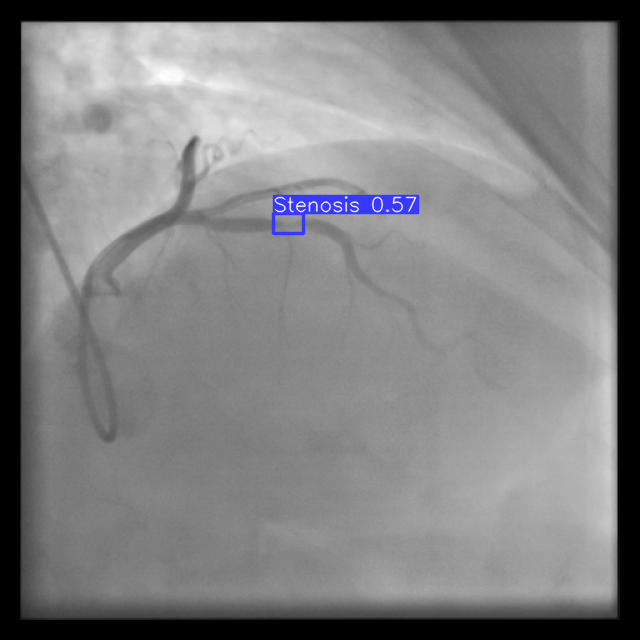

In [3]:
import matplotlib.pyplot as plt
Image.fromarray(results[0].plot())

In [6]:
model = YOLO("runs/detect/train11/weights/last.pt")
model.train(data="Coronarography-1\data.yaml", epochs=15)
metrics = model.val()

New https://pypi.org/project/ultralytics/8.0.215 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.207  Python-3.9.3 torch-2.1.0+cpu CPU (AMD Ryzen 7 4700U with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=runs/detect/train11/weights/last.pt, data=Coronarography-1\data.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=N